# EDA (ANALISIS EXPLORATORIO DE DATOS)  STEAM

In [2]:
# LIBRERIAS QUE SE USARAN 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
# Read the data files
df_games = pd.read_parquet('C:/Users/Edgar/OneDrive/Escritorio/ProyectoFinal1HenryNuevo/ArchivosFinales/dfgamesrecomendacion.parquet', engine='pyarrow')
df_user_reviews = pd.read_parquet('C:/Users/Edgar/OneDrive/Escritorio/ProyectoFinal1HenryNuevo/ArchivosFinales/dfreviews.parquet', engine='pyarrow')
df_user_items = pd.read_parquet('C:/Users/Edgar/OneDrive/Escritorio/ProyectoFinal1HenryNuevo/ArchivosFinales/dfitems.parquet', engine='pyarrow')

In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139402 entries, 0 to 139401
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   item_id       139402 non-null  int64  
 1   app_name      139402 non-null  object 
 2   title         139402 non-null  object 
 3   genres        139402 non-null  object 
 4   release_date  139402 non-null  object 
 5   developer     139402 non-null  object 
 6   price         139402 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 7.4+ MB


In [5]:
df_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             59305 non-null  object 
 1   item_id             59305 non-null  object 
 2   helpful             59305 non-null  object 
 3   recommend           59305 non-null  bool   
 4   year                59305 non-null  object 
 5   sentiment_analisis  59305 non-null  int64  
 6   polaridad           59305 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 2.8+ MB


In [6]:
df_user_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           int64 
 1   item_name         object
 2   playtime_forever  int64 
 3   user_id           object
 4   steam_id          object
 5   items_count       int64 
dtypes: int64(3), object(3)
memory usage: 235.9+ MB


# steam games 

In [7]:
df_games.isnull().sum()

item_id         0
app_name        0
title           0
genres          0
release_date    0
developer       0
price           0
dtype: int64

In [8]:
#diferentes generos de juegos Steam
cantidad_generos= df_games["genres"].value_counts()
cantidad_generos.to_frame

<bound method Series.to_frame of genres
Indie            14686
Action           10556
Adventure         8204
Casual            8191
Strategy          6656
                 ...  
Cycling              4
Voice Control        4
Faith                2
Hardware             2
Foreign              1
Name: count, Length: 340, dtype: int64>

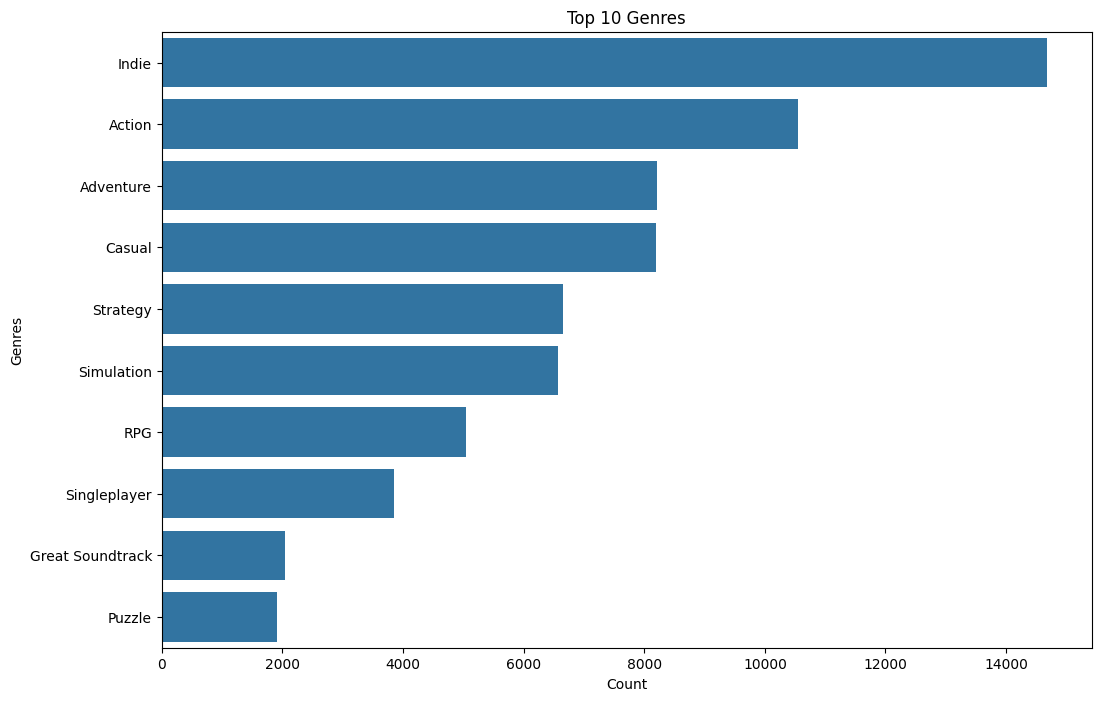

In [11]:
# Contar las ocurrencias de cada género
genre_counts = df_games['genres'].value_counts()

# Seleccionar los 10 géneros más comunes
top_genres = genre_counts.head(10).index

# Filtrar el DataFrame para incluir solo los 10 géneros más comunes
df_top_genres = df_games[df_games['genres'].isin(top_genres)]

# Graficar los 10 géneros más comunes
plt.figure(figsize=(12, 8))
sns.countplot(data=df_top_genres, y='genres', order=top_genres)
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

In [10]:
cantidad_juegos= len(df_games["item_id"].unique())
cantidad_juegos # contiene 32082 juegos unicos

26110

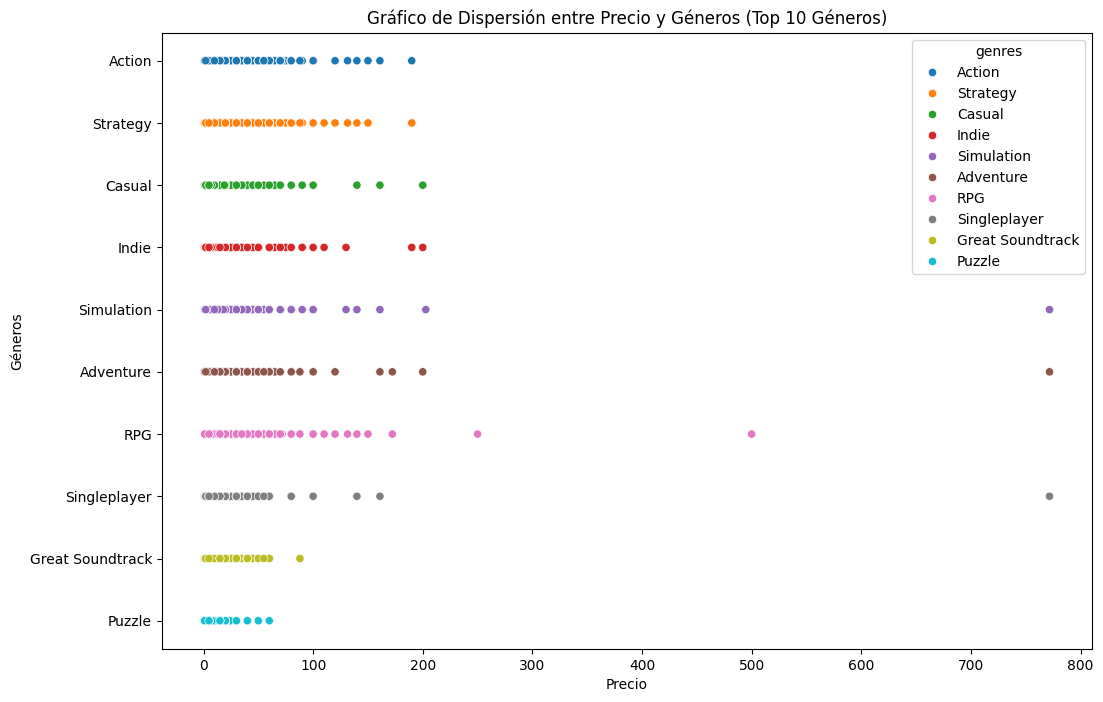

In [17]:
# Contar las ocurrencias de cada género
genre_counts = df_games['genres'].value_counts()

# Seleccionar los 10 géneros más comunes
top_genres = genre_counts.head(10).index

# Filtrar el DataFrame para incluir solo los 10 géneros más comunes
df_top_genres = df_games[df_games['genres'].isin(top_genres)]

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_top_genres, x='price', y='genres', hue='genres', palette='tab10')
plt.title('Gráfico de Dispersión entre Precio y Géneros (Top 10 Géneros)')
plt.xlabel('Precio')
plt.ylabel('Géneros')
plt.show()

In [14]:
# top de juegos mas caros.
games_price= df_games[["item_id","app_name","price"]] #dejo las columnas que necesito, porque quiero ver el item_id unico
games_price= games_price.drop_duplicates()
games_price.sort_values(by = ['price'], inplace=True,ascending=False)
games_price.head(10)

,item_id,app_name,price
53830,719000,Strata Spaces VR – Professional Edition Upgrade,995.00
13409,292180,X-Plane 10 Global - 64 Bit,771.71
61089,691560,CUR3D Maker Edition - Permission for commercia...,499.99
73760,629796,EVE Online: 15400 PLEX,499.99
42394,585610,GameMaker Studio 2 UWP,399.99
42386,585620,GameMaker Studio 2 Mobile,399.99
43630,598860,MAGIX Video Pro X8 Steam Edition,399.00
59360,750840,MAGIX Video Pro X9 Steam Edition,399.00
66612,689790,VEGAS Pro 15 Edit Steam Edition,399.00
52493,707410,Marvelous Designer 7 For Steam,320.00


In [15]:
developer= df_games["developer"].value_counts()
developer

developer
SmiteWorks USA, LLC           3928
Ubisoft - San Francisco       2525
Dovetail Games                1090
Paradox Development Studio     486
DL Softworks                   485
                              ... 
Team NINJA                       1
Virtualdesign3d.com              1
Ground Up Games Pty Ltd ®        1
Computerhouse                    1
Sam Atlas                        1
Name: count, Length: 10082, dtype: int64

Text(0.5, 1.0, 'Top 10 Developers')

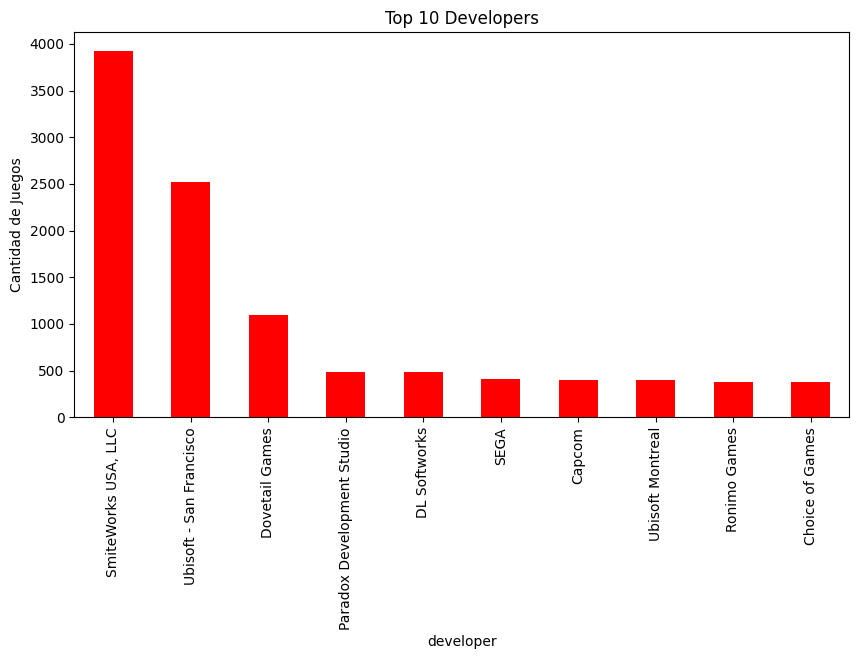

In [16]:
plt.figure(figsize=(10, 5))
developer[:10].plot(kind='bar', color='red')
plt.xlabel('developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Developers')
#DEVELOPERS

# EDA USER ITEMS

In [19]:
df_user_items.isnull().sum()

item_id             0
item_name           0
playtime_forever    0
user_id             0
steam_id            0
items_count         0
dtype: int64

In [20]:
df_user_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           int64 
 1   item_name         object
 2   playtime_forever  int64 
 3   user_id           object
 4   steam_id          object
 5   items_count       int64 
dtypes: int64(3), object(3)
memory usage: 235.9+ MB


In [21]:
#cantidad de juegos
cant_juegos= len(df_user_items["item_name"].unique())
cant_juegos # en steam hay 10947 juegos

10947

In [22]:
#conteo por titulo 
juego = df_user_items["item_name"].value_counts()
juego # el juego mas repetido es dota 2 test, esto puede ser la cantidad de usuarios que juegan, o comentan

item_name
Dota 2 Test                            49571
Counter-Strike: Global Offensive       43776
Garry's Mod                            43301
Unturned                               38682
Left 4 Dead 2                          37044
                                       ...  
My Own Pet                                 1
Medieval Battlefields Black Edition        1
Football VR                                1
Tower Dwellers                             1
Arachnophobia                              1
Name: count, Length: 10947, dtype: int64

In [23]:
# Agrupa por usuario la cantidad de items, lo conviente en data frame y los ordena de mayor a menor
items_count = df_user_items.groupby('user_id')['items_count'].unique()
items_count= pd.DataFrame(items_count)
items_count_user = items_count.sort_values('items_count', ascending=False)
items_count_user   # el usuario phrostb a jugado mas de 7762 juegos

,items_count
user_id,
phrostb,[7762]
thugnificent,[6700]
chidvd,[6410]
piepai,[6132]
mayshowganmore,[5027]
...,...
76561198092978311,[1]
76561198092984441,[1]
76561198092985047,[1]


In [24]:
time_count = df_user_items.groupby('user_id')['playtime_forever'].unique().explode()
time_count= pd.DataFrame(time_count)
time_count_user = time_count.sort_values('playtime_forever', ascending=False)
time_count_user   # top de personas que mas han jugado. 

,playtime_forever
user_id,
wolop,642773
Evilutional,635295
76561198019826668,632452
76561198039832932,613411
tsunamitad,600068
...,...
76561198031798372,0
Cjixeres,0
76561198085797241,0


# EDA User reviews

In [25]:
# revisar nulos
df_user_reviews.isnull().sum()

user_id               0
item_id               0
helpful               0
recommend             0
year                  0
sentiment_analisis    0
polaridad             0
dtype: int64

In [26]:
cantidad_user_reviews= len(df_user_reviews["user_id"].unique())
cantidad_user_reviews #hay 25467 usuarios registrados

25467

In [27]:
cant_recomendacion= df_user_reviews["recommend"].value_counts()
cant_recomendacion # cantidad de recomendaciones por genero

recommend
True     52473
False     6832
Name: count, dtype: int64

    - positivo = 2 
    - negativo = 0 
    - neutral = 1

In [29]:
analisissentimiento= df_user_reviews["sentiment_analisis"].value_counts()
analisissentimiento
# Hay menos comentarios negativos

sentiment_analisis
1    40269
2    15349
0     3687
Name: count, dtype: int64

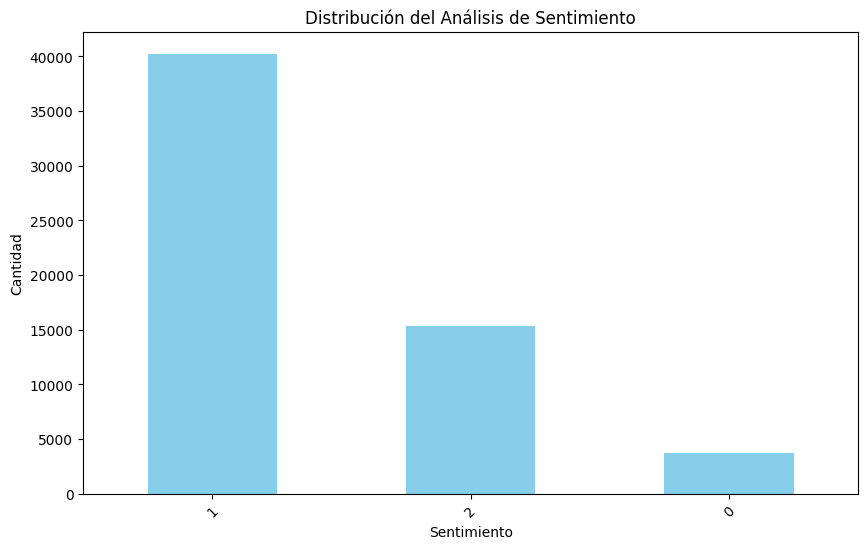

In [30]:
# Crear un gráfico de barras
plt.figure(figsize=(10, 6))  # Configurar el tamaño del gráfico
analisissentimiento.plot(kind='bar', color='skyblue')

# Añadir títulos y etiquetas
plt.title('Distribución del Análisis de Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización

# Mostrar el gráfico
plt.show()